# Dashboard

In [71]:
import panel as pn
import pandas as pd

## Import notebooks

/Users/jorgegarcelan/Desktop/UNI/5-MASTER IAA/SC4/CIUDADES/PROJECT/smart_cities/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


                   R2 Score       MSE
Model                                
Random Forest      0.634591  0.725693
Gradient Boosting  0.636720  0.721464
Ridge Regression   0.438335  1.115451
=== Random Forest ===
      feature  importance
4  unemp_rate    0.357050
1  stops_rate    0.294965
3   rail_rate    0.184716
0    acc_rate    0.111318
2     no2_avg    0.051950

=== Gradient Boosting ===
      feature  importance
4  unemp_rate    0.359197
3   rail_rate    0.236613
1  stops_rate    0.227995
0    acc_rate    0.122857
2     no2_avg    0.053338



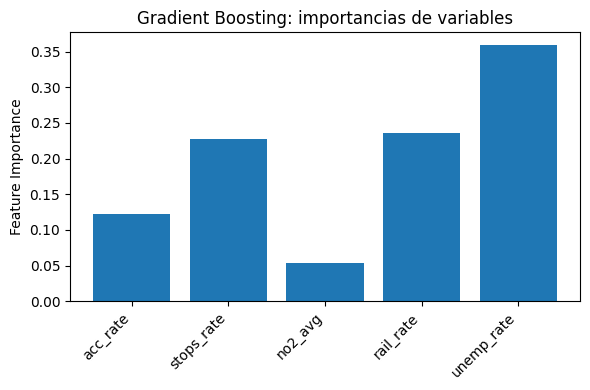

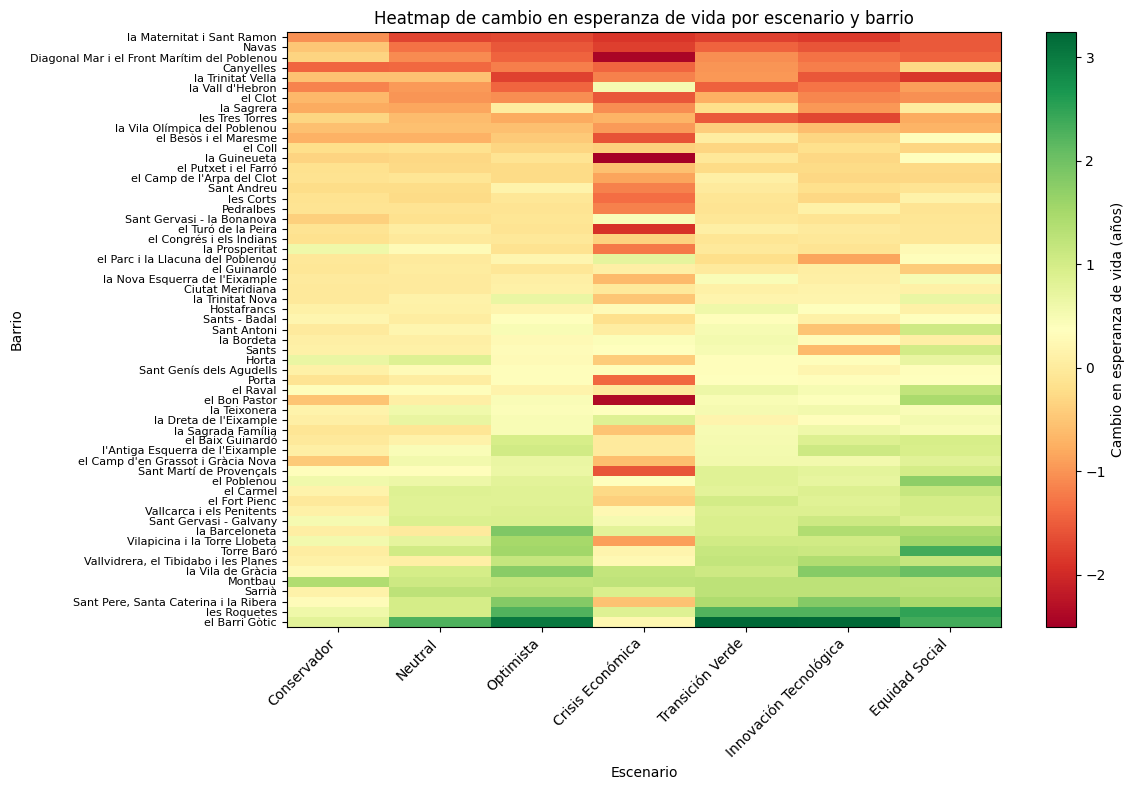

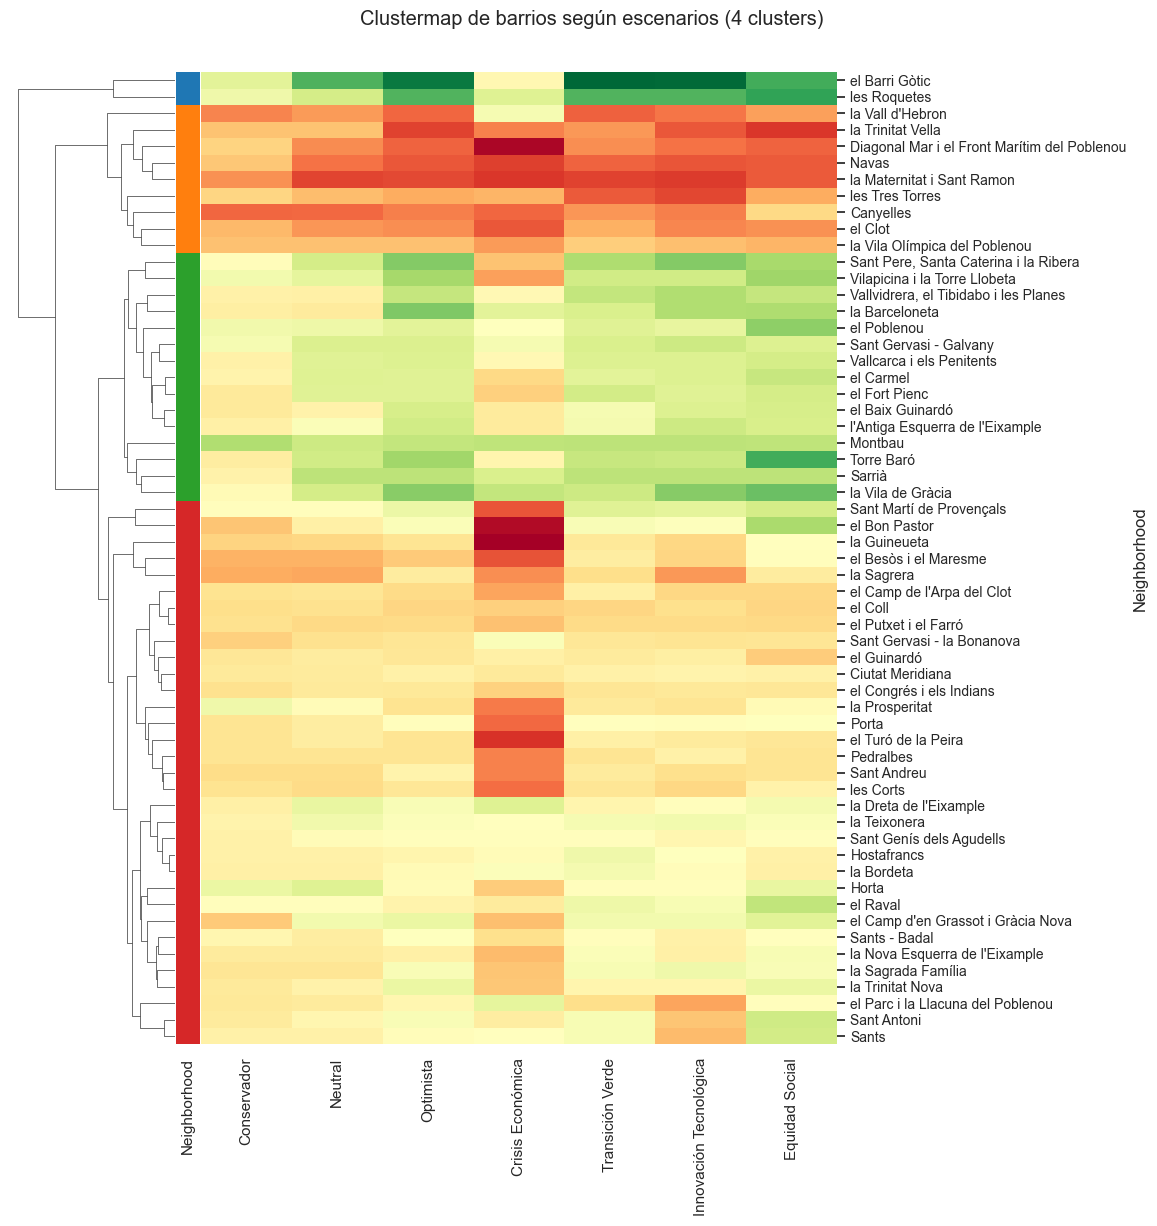

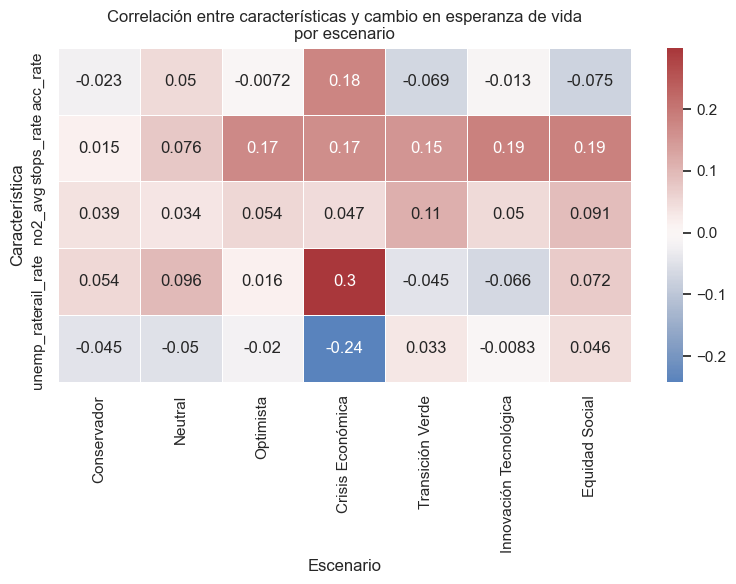

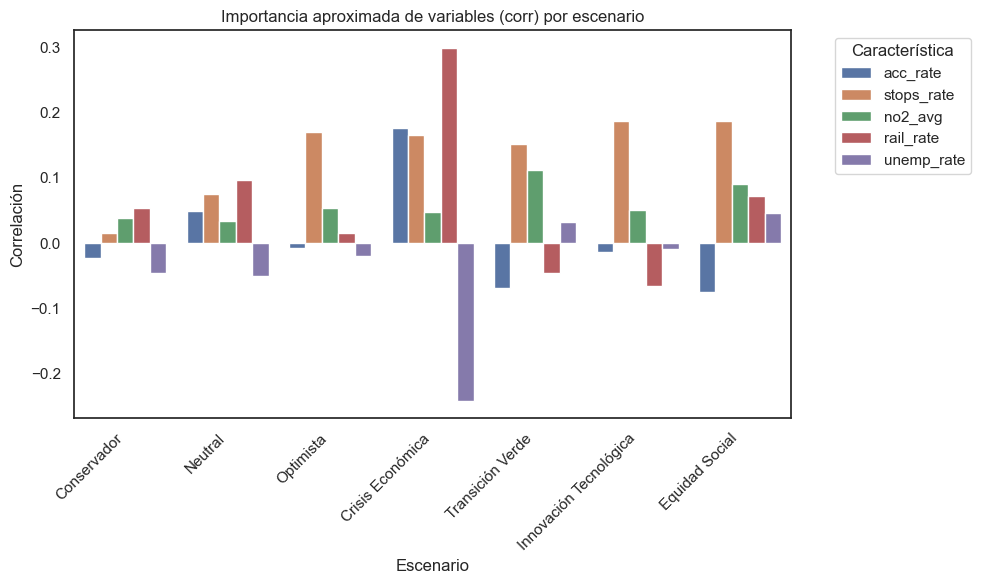

/var/folders/dh/_ks73kfn57l67vxm7b5y16qw0000gn/T/ipykernel_46362/867110870.py:19: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bplot = plt.boxplot(


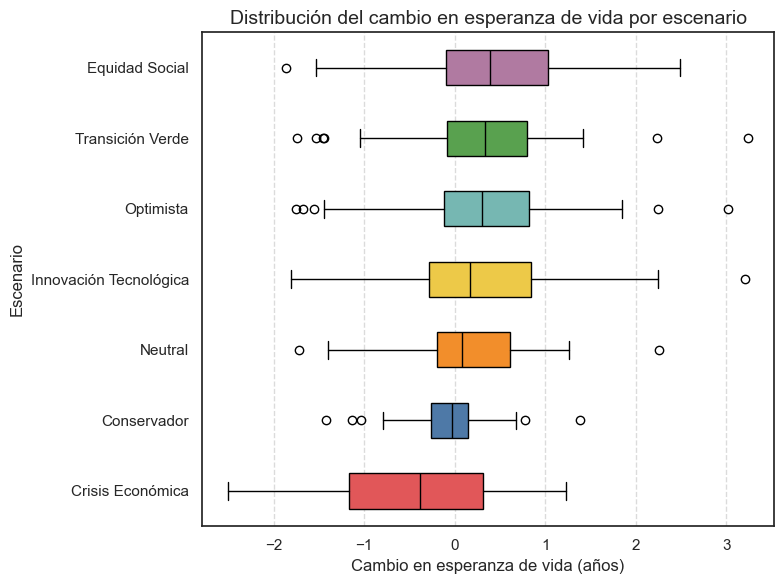

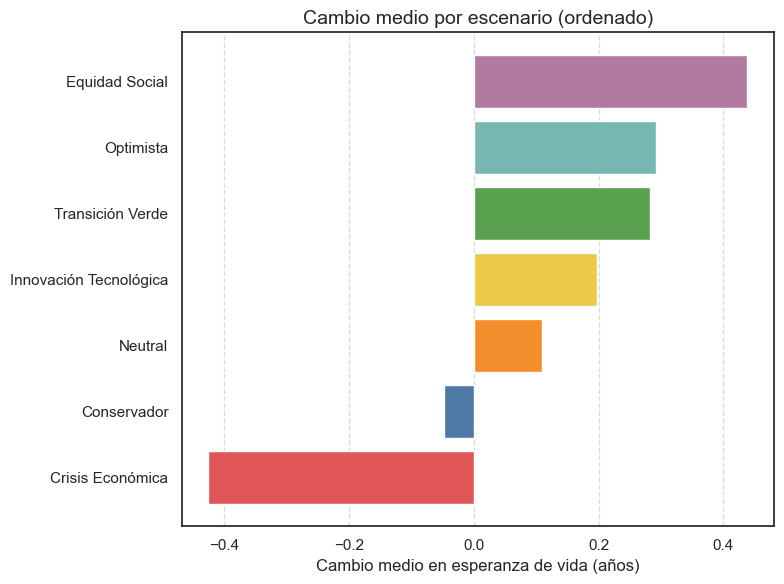

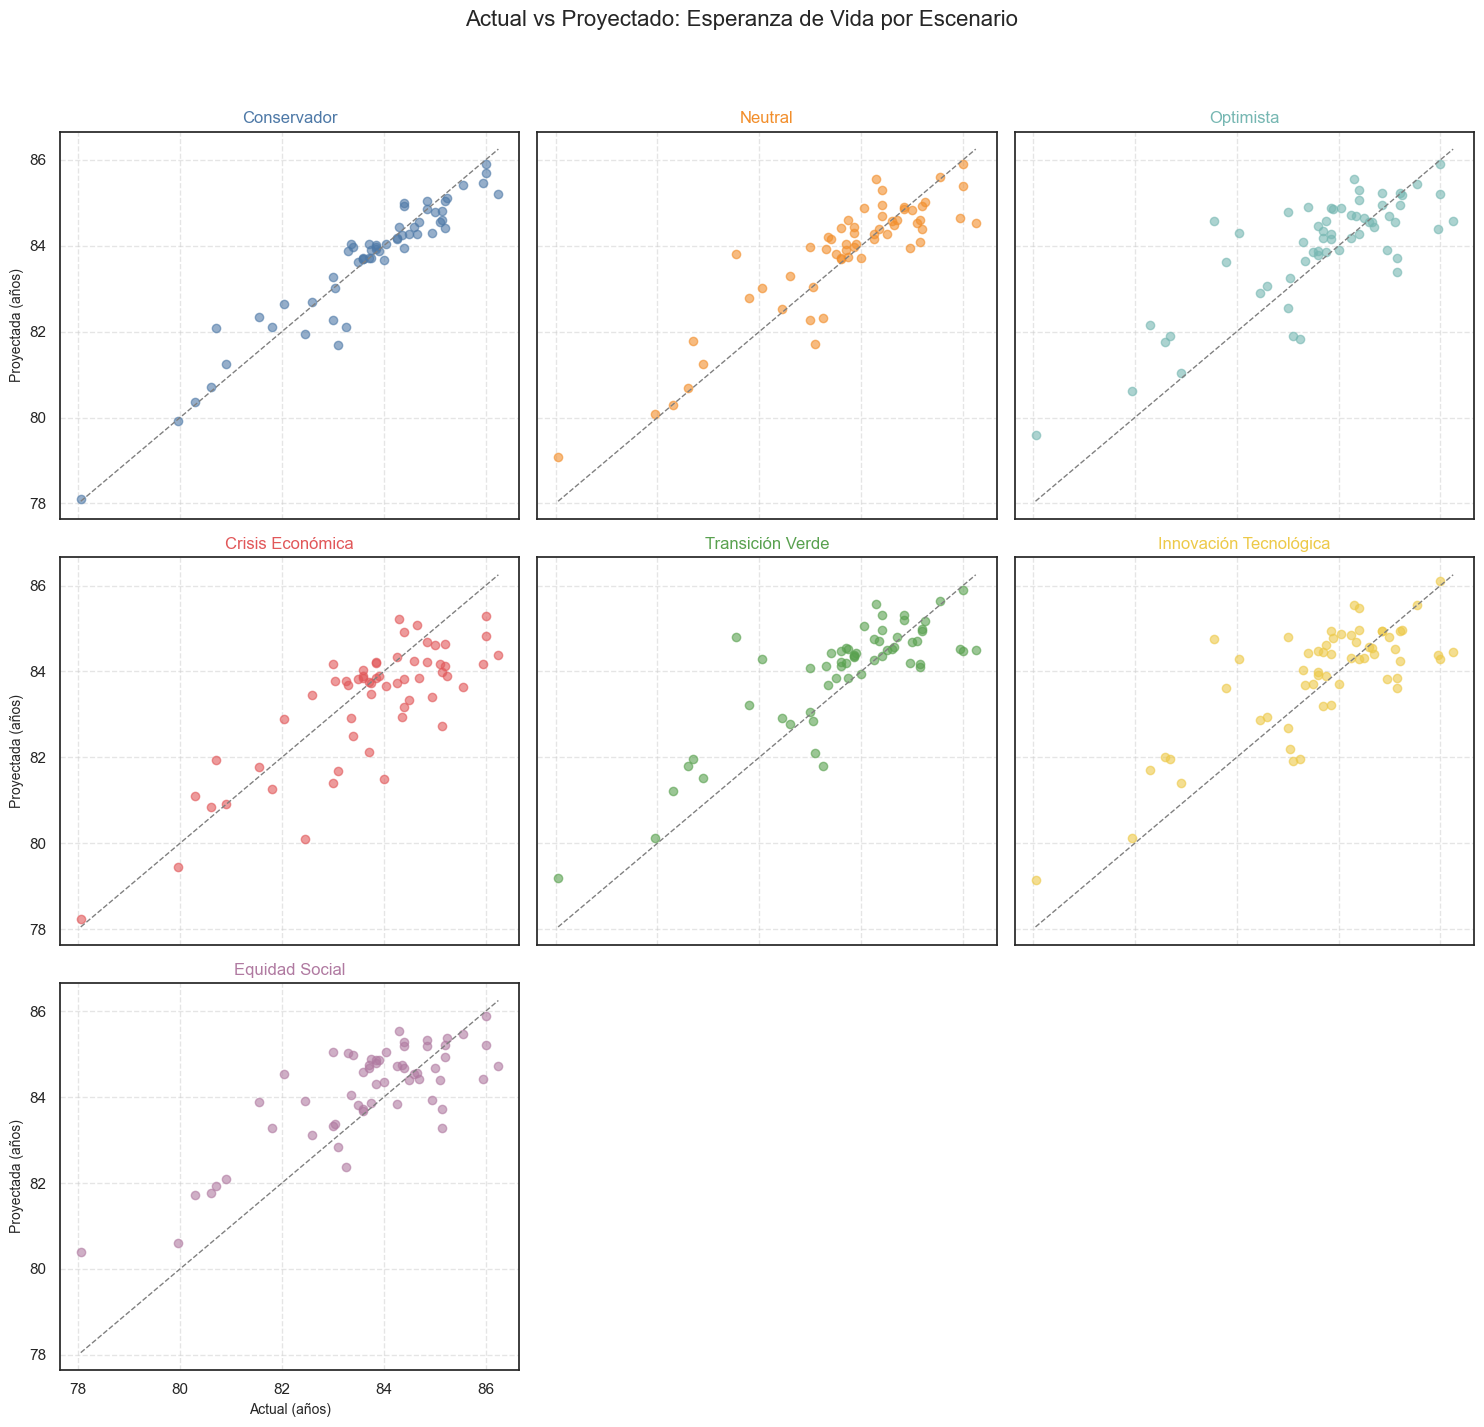

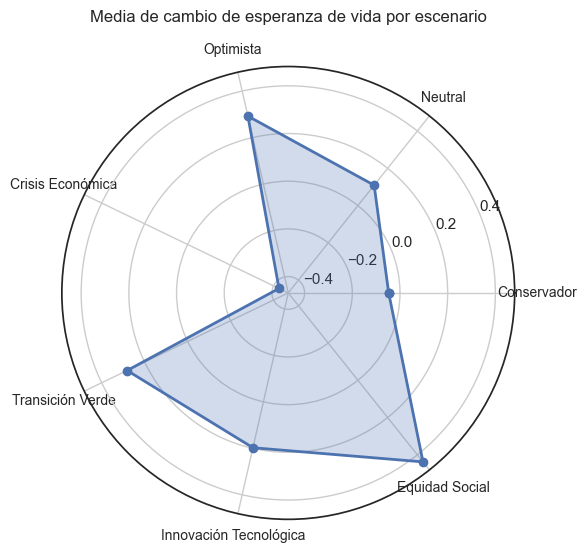

In [79]:
%run model_ml.ipynb

## Fondo tabs

In [72]:
# Pane HTML que pinta el fondo de la intro
intro_html = pn.pane.HTML("""
<div style="
    position: fixed;
    width: 100vw;
    height: 100vh;
    background-image: url('images/background.png');
    background-size: cover;
    background-position: center;
    z-index: -1;
">
</div>
""", sizing_mode="stretch_both")

In [73]:
# Logo
logo_tabs = pn.pane.PNG("images/logo.png", width=500)

## Intro 

In [74]:
pn.extension()

# Layout final con todo centrado
intro_tab = pn.Column(
    pn.Row(intro_html, align="center"),
    sizing_mode="stretch_width",
    align="center"
)

/var/folders/dh/_ks73kfn57l67vxm7b5y16qw0000gn/T/ipykernel_46362/3182960768.py:1: UserWarning: Using Panel interactively in VSCode notebooks requires the jupyter_bokeh package to be installed. You can install it with:

   pip install jupyter_bokeh

or:
    conda install jupyter_bokeh

and try again.
  pn.extension()


## Datos

In [75]:
df = pd.read_csv("data/df_final.csv")
datos_tab = pn.Column(
    pn.Row(logo_tabs),
    "# 🧾 Datos",
    pn.widgets.DataFrame(df, width=1400, height=600),
    sizing_mode="stretch_width"
)

## Análisis de datos

## Modelo ML

In [ ]:
modelo_ml_tab = pn.Column(
    pn.Row(logo_tabs),
    "# 📈 Modelo ML",
    pn.Accordion(
        ("Distribución de viajes por distancia", pn.pane.Matplotlib(plot_hist_trip_distance(df), tight=True, width=1200, height=600)),
        ("Boxplot de viajes por distancia", pn.pane.Matplotlib(plot_boxplot_trip_distance(df), tight=True, width=1200, height=600)),
        ("Distribución de viajes por año", pn.pane.Matplotlib(plot_viajes_año(df), tight=True, width=1200, height=600)),
        ("Distribución de viajes por mes", pn.pane.Matplotlib(plot_viajes_mes(df), tight=True, width=1200, height=600)),
        ("Heatmap de viajes por día y mes", pn.pane.Matplotlib(plot_heatmap_viajes_dia_mes(df), tight=True, width=1200, height=600)),
        ("Boxplot de viajes por coste", pn.pane.Matplotlib(plot_boxplot_trip_fare(df), tight=True, width=1200, height=600)),
        ("Relación entre distancia y coste del viaje", pn.pane.Matplotlib(plot_joint_trip_vs_fare(df).fig, tight=True, width=1200, height=600)),
        ("Coste del viaje por rangos de distancia", pn.pane.Matplotlib(plot_boxplot_fare_by_distance_group(df), tight=True, width=1200, height=600)),
        ("Distribución del número de pasajeros por viaje", pn.pane.Matplotlib(plot_passenger_count(df), tight=True, width=1200, height=600)),
    ),
    sizing_mode='stretch_width'
)

## Tabs

In [76]:
pn.extension('tabulator')

# Tabs
tabs = pn.Tabs(
    ("📘 Introducción", intro_tab),
    ("🧾 Datos", datos_tab),
    ("📊 Análisis de datos", analisis_tab),
    ("📈 Modelo ML", modelo_ml_tab),
    ("🗺️ Predicción de Esperanza de Vida", prediccion_esp),
)

/var/folders/dh/_ks73kfn57l67vxm7b5y16qw0000gn/T/ipykernel_46362/2203033843.py:1: UserWarning: Using Panel interactively in VSCode notebooks requires the jupyter_bokeh package to be installed. You can install it with:

   pip install jupyter_bokeh

or:
    conda install jupyter_bokeh

and try again.
  pn.extension('tabulator')


## App

In [77]:
dashboard = pn.Column(tabs)
dashboard.save("dashboard_bcn.html", embed=True)